In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score, classification_report
import numpy as np


In [2]:
# Load dataset
dataset = pd.read_csv('training_dataset.csv')
dataset.head()

,created_at,default_profile,description,favourites_count,followers_count,friends_count,location,screen_name,statuses_count,verified,account_age_days,account_type
0,2012-10-05 06:54:26,True,A visitor from Mars could easily pick out the ...,2169,0,111,"Franklin, United States",lyndellwa88n49u,2195,False,2875,bot
1,2009-08-23 08:01:09,True,Do you like fast? Come in! 😻😻😻 https://t.co/k5...,54,6,65,Hungary,heyimjennu,11,False,4014,bot
2,2012-06-13 21:56:24,False,26 lesbian she/they 🏳️‍🌈 i love my grandma @nl...,34328,1132,468,unknown,JessiLyonne,28628,False,2988,human
3,2014-05-25 15:42:48,False,@celia_dvrT\n1000年の苦しみ,6737,83,382,Konoha,thxdxr,13023,False,2277,human
4,2012-04-27 01:45:11,False,#ITweetMuseums...mostly insight into their col...,13498,4397,198,"New York, NY",MarkBSchlemmer,15257,False,3036,human


In [3]:
def preprocessing():
    # menghapus nilai duplikat yang sama
    dataset = dataset.drop_duplicates(keep='first', inplace=False)
    # mengubah format datetime dalam format standar
    dataset['created_at']= pd.to_datetime(dataset['created_at'])
    print(len(dataset))
    print(dataset['created_at'].dtype)
    # dataset.replace(np.inf, 0) 
    # dataset.replace(-np.inf, 0)

In [4]:
dataset['ratio_statuses_count_per_age']=dataset['statuses_count']/dataset['account_age_days']

In [5]:
dataset['ratio_favorites_per_age']=dataset['favourites_count']/dataset['account_age_days']

In [6]:
dataset['ratio_friends_per_followers']=dataset['friends_count']/dataset['followers_count']

In [7]:
dataset['description'].fillna('x', inplace = True)

In [8]:
dataset['word_count']=dataset['description'].apply(lambda x: 
len(str(x).split(" ")))#count the word

In [9]:
dataset['char_count'] = dataset['description'].str.len() 
#count the character including space

In [10]:
dataset['reputation']= dataset['followers_count']/(dataset['followers_count']+ dataset['friends_count'])
dataset.head()
print(len(dataset))


1200


In [11]:
#Feture Entrophy
# Mengubah tipe data kolom 'created_at' menjadi datetime
dataset['created_at'] = pd.to_datetime(dataset['created_at'])
#menugurutkan
dataset.sort_values(["screen_name", "created_at"])
dataset.head()
print(len(dataset))


1200


In [12]:
# dataset['time_diff'] = (dataset['created_at'] - dataset['created_at'].shift()).abs()  / np.timedelta64(1, 'h')
# #fill missing value in time_diff with zero
# dataset['time_diff'] = dataset['time_diff'].fillna(0)
# #there is 50 tweet per user extracted, so n=50
# g_sum = 50 
# #measure the probability for this interval
# values = dataset['time_diff']/g_sum
# #time interval entropy
# dataset['entropy'] = -(values*np.log(values))
# dataset['entropy'] = dataset['entropy'].fillna(0)
# # dataset.dropna(inplace=True)
# # dataset.drop(dataset[dataset.entropy < 0].index, inplace=True)
# dataset.to_csv('hasil_min.csv')



In [13]:
dataset.drop(['created_at'], axis=1,inplace=True)
# dataset.head()

In [14]:
# mengubah menjadi boolean dan mengecek apakah tidak ada null.
dataset['location']=pd.notnull(dataset['location'])
dataset.head()
print(len(dataset))

1200


In [15]:
# mengecek apakah dalam descripsi ada teks bot atau tidak dan menjadikannya kedalam bolean
import re
dataset['contains_bot_name']=dataset['description'].str.extract("\b(bot|b0t|updates|hourly|automatically|generating|generated|every|computer-generated|twitterbot|automated|FakeBots|')\b|Bots", 
                                                                        flags=re.IGNORECASE,expand=False)
                                                                        # regex=True)
dataset['contains_bot_name'].fillna(0).astype(bool).sum(axis=0)

0

In [16]:
#Feature avg_word
dataset['description'] = dataset['description'].astype(str)
dataset['description_word_count'] = dataset['description'].apply(lambda x: len(str(x).split()))
dataset['description_character_count'] = dataset['description'].apply(lambda x: sum(len(word) for word in str(x).split()))
dataset['avg_word'] = dataset['description_character_count'] / dataset['description_word_count']
dataset.head()

,default_profile,description,favourites_count,followers_count,friends_count,location,screen_name,statuses_count,verified,account_age_days,...,ratio_statuses_count_per_age,ratio_favorites_per_age,ratio_friends_per_followers,word_count,char_count,reputation,contains_bot_name,description_word_count,description_character_count,avg_word
0,True,A visitor from Mars could easily pick out the ...,2169,0,111,True,lyndellwa88n49u,2195,False,2875,...,0.763478,0.754435,inf,18,102,0.000000,NaN,18,85,4.722222
1,True,Do you like fast? Come in! 😻😻😻 https://t.co/k5...,54,6,65,True,heyimjennu,11,False,4014,...,0.002740,0.013453,10.833333,8,54,0.084507,NaN,8,47,5.875000
2,False,26 lesbian she/they 🏳️‍🌈 i love my grandma @nl...,34328,1132,468,True,JessiLyonne,28628,False,2988,...,9.580991,11.488621,0.413428,10,54,0.707500,NaN,10,45,4.500000
3,False,@celia_dvrT\n1000年の苦しみ,6737,83,382,True,thxdxr,13023,False,2277,...,5.719368,2.958718,4.602410,1,21,0.178495,NaN,2,20,10.000000
4,False,#ITweetMuseums...mostly insight into their col...,13498,4397,198,True,MarkBSchlemmer,15257,False,3036,...,5.025362,4.445982,0.045031,19,157,0.956910,NaN,19,139,7.315789


In [17]:
dataset.to_csv("ceknihboy.csv")

In [18]:
dataset.drop(['screen_name','description'], inplace=True, axis=1)

In [19]:
# dataset.head()
dataset["reputation"].fillna(0, inplace = True) 

In [20]:
dataset["contains_bot_name"].fillna(False, inplace=True)
dataset.replace(np.inf, 0)
dataset.replace(-np.inf, 0)

,default_profile,favourites_count,followers_count,friends_count,location,statuses_count,verified,account_age_days,account_type,ratio_statuses_count_per_age,ratio_favorites_per_age,ratio_friends_per_followers,word_count,char_count,reputation,contains_bot_name,description_word_count,description_character_count,avg_word
0,True,2169,0,111,True,2195,False,2875,bot,0.763478,0.754435,inf,18,102,0.000000,False,18,85,4.722222
1,True,54,6,65,True,11,False,4014,bot,0.002740,0.013453,10.833333,8,54,0.084507,False,8,47,5.875000
2,False,34328,1132,468,True,28628,False,2988,human,9.580991,11.488621,0.413428,10,54,0.707500,False,10,45,4.500000
3,False,6737,83,382,True,13023,False,2277,human,5.719368,2.958718,4.602410,1,21,0.178495,False,2,20,10.000000
4,False,13498,4397,198,True,15257,False,3036,human,5.025362,4.445982,0.045031,19,157,0.956910,False,19,139,7.315789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,False,1669,43746,968,True,2009,False,2993,human,0.671233,0.557634,0.022128,19,134,0.978351,False,19,116,6.105263
1196,True,724,171030,169,True,3335,True,2333,human,1.429490,0.310330,0.000988,11,91,0.999013,False,11,81,7.363636
1197,True,2260,22,0,True,3438,False,3136,bot,1.096301,0.720663,0.000000,1,1,1.000000,False,1,1,1.000000
1198,True,1273,28,319,True,2063,False,4027,bot,0.512292,0.316116,11.392857,1,1,0.080692,False,1,1,1.000000


In [21]:
dataset=dataset.replace([np.inf, -np.inf], np.nan)
dataset=dataset.replace([np.inf, -np.inf], np.nan).dropna(how="all")
dataset = dataset.fillna(dataset.mean())
dataset.head()

C:\Users\xotiss\AppData\Local\Temp\ipykernel_9148\1888651205.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset = dataset.fillna(dataset.mean())


,default_profile,favourites_count,followers_count,friends_count,location,statuses_count,verified,account_age_days,account_type,ratio_statuses_count_per_age,ratio_favorites_per_age,ratio_friends_per_followers,word_count,char_count,reputation,contains_bot_name,description_word_count,description_character_count,avg_word
0,True,2169,0,111,True,2195,False,2875,bot,0.763478,0.754435,2.303236,18,102,0.000000,False,18,85,4.722222
1,True,54,6,65,True,11,False,4014,bot,0.002740,0.013453,10.833333,8,54,0.084507,False,8,47,5.875000
2,False,34328,1132,468,True,28628,False,2988,human,9.580991,11.488621,0.413428,10,54,0.707500,False,10,45,4.500000
3,False,6737,83,382,True,13023,False,2277,human,5.719368,2.958718,4.602410,1,21,0.178495,False,2,20,10.000000
4,False,13498,4397,198,True,15257,False,3036,human,5.025362,4.445982,0.045031,19,157,0.956910,False,19,139,7.315789


In [22]:
# Preprocessing menjadikan ke boolean kolom
# boolean_cols: list = ["default_profile", "default_profile_image",
#                       "geo_enabled", "verified"]
# twitter_accounts_df = convert_bool_to_int(data=dataset, boolean_cols=boolean_cols)
# twitter_accounts_df.head()

In [23]:
# EDA

import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from collections import OrderedDict

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['figure.figsize'] = 12, 8
mpl.rcParams['font.sans-serif'] = ['Tahoma']
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [24]:
# Set up some parameters for EDA
palette: str = "husl"
grouped: str = "account_type"
default_value: str = "unknown"



In [25]:
import logging
logger = logging.getLogger(__name__)

def get_labels_colors_from_pandas_column(df: pd.DataFrame, column: str, palette: str):
    data_labels: dict = dict()
    try:
        labels: list = df[column].unique().tolist()
        colors: list = sns.color_palette(palette, len(labels))
        data_labels: dict = dict(zip(labels, colors))
    except Exception as e:
        logger.error(e)
    return data_labels

# Retrieve labels and additional parameters to plot figures
data_labels: dict = get_labels_colors_from_pandas_column(
    df=dataset, column=grouped, palette=palette)


In [26]:
# Show labels
print(f"Unique Target values: {data_labels.keys()}")

Unique Target values: dict_keys(['bot', 'human'])


In [27]:
# Functions to plot data distributions
def plot_multiple_histograms(data: pd.DataFrame,
                             grouped_col: str,
                             target_col: str,
                             data_labels: dict):
    # Plot
    plt.figure(figsize=(12, 10))
    title = "\n"
    labels: list = list(data_labels.keys())
    for j, i in enumerate(labels):
        x = data.loc[data[grouped_col] == i, target_col]
        mu_x = round(float(np.mean(x)), 3)
        sigma_x = round(float(np.std(x)), 3)
        ax = sns.distplot(x, color=data_labels.get(i), label=i, hist_kws=dict(alpha=.1),
                          kde_kws={'linewidth': 2})
        ax.axvline(mu_x, color=data_labels.get(i), linestyle='--')
        ax.set(xlabel=f"{target_col.title()}", ylabel='Density')
        title += f"Parameters {str(i)}: $G(\mu=$ {mu_x}, $\sigma=$ {sigma_x} \n"
        ax.set_title(title)
    plt.legend(title="Account Type")
    plt.grid()
    plt.tight_layout()
    plt.show()


def plot_multiple_boxplots(data: pd.DataFrame, grouped_col: str, target_col: str,
                           palette: str = "husl"):
    plt.figure(figsize=(12, 10))

    means: dict = data.groupby([grouped_col])[target_col].mean().to_dict(OrderedDict)
    counter: int = 0

    bp = sns.boxplot(x=grouped_col, y=target_col, data=data, palette=palette, order=list(means.keys()))
    bp.set(xlabel='', ylabel=f"{target_col.title()}")
    ax = bp.axes

    for k, v in means.items():
        # every 4th line at the interval of 6 is median line
        # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
        mean = round(v, 2)
        ax.text(
            counter,
            mean,
            f'{mean}',
            ha='center',
            va='center',
            fontweight='bold',
            size=10,
            color='white',
            bbox=dict(facecolor='#445A64'))
        counter += 1
    bp.figure.tight_layout()
    plt.grid()
    plt.show()

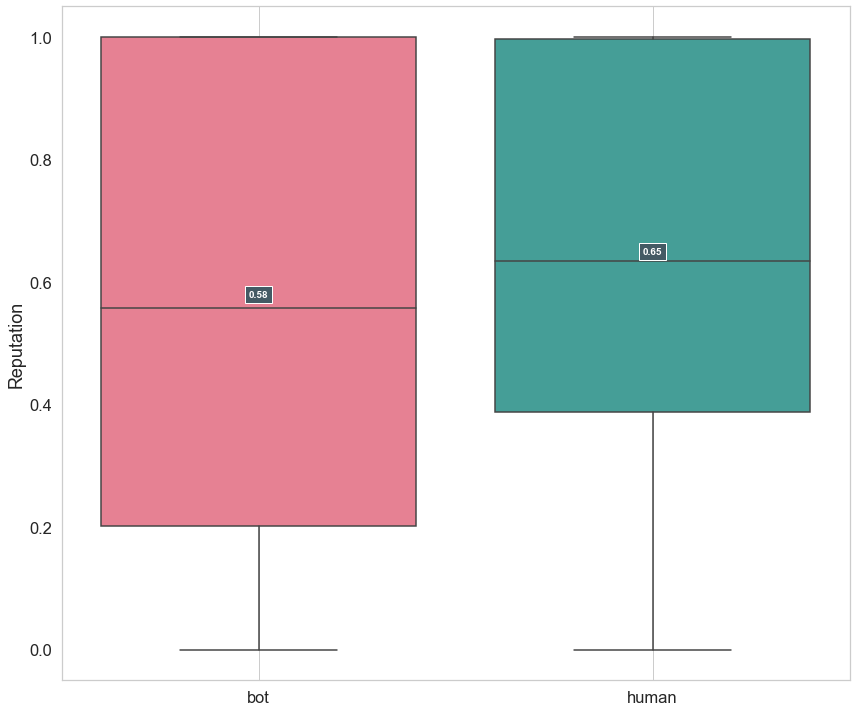

In [28]:
target: str = "reputation"  
# Extract histograms
# plot_multiple_histograms(data=twitter_accounts_df, 
#                          grouped_col=grouped,
#                          data_labels=data_labels,
#                          target_col=target)
# Extract Box-plots
plot_multiple_boxplots(data=dataset,
                       grouped_col=grouped,
                       target_col=target,
                       palette=palette)



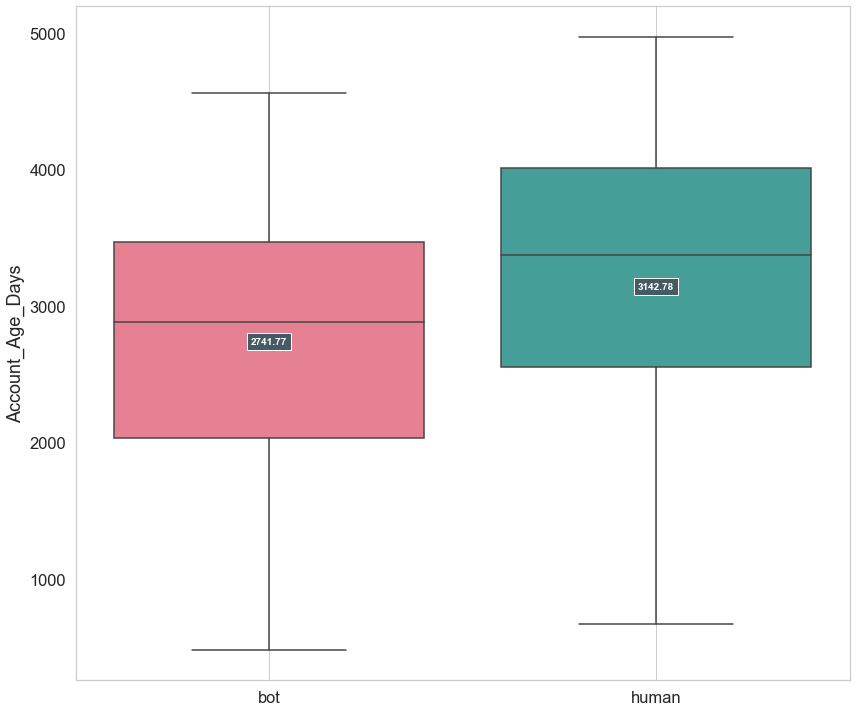

In [29]:
# analyse the average tweets per day
target: str = "account_age_days"  
# # Extract histograms
# plot_multiple_histograms(data=twitter_accounts_df, 
#                          grouped_col=grouped,
#                          data_labels=data_labels,
#                          target_col=target)
# Extract Box-plots
plot_multiple_boxplots(data=dataset,
                       grouped_col=grouped,
                       target_col=target,
                       palette=palette)

<AxesSubplot:xlabel='account_type'>

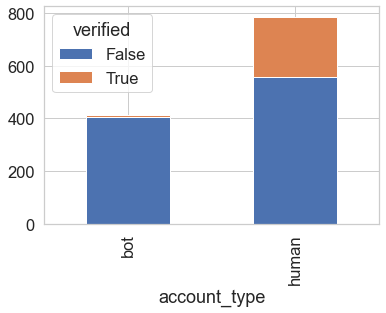

In [30]:
target_col: str = "verified"
twitter_accounts_df2 = dataset.groupby([grouped, target_col])[grouped].count().unstack(target_col)
twitter_accounts_df2.plot(kind='bar', stacked=True)

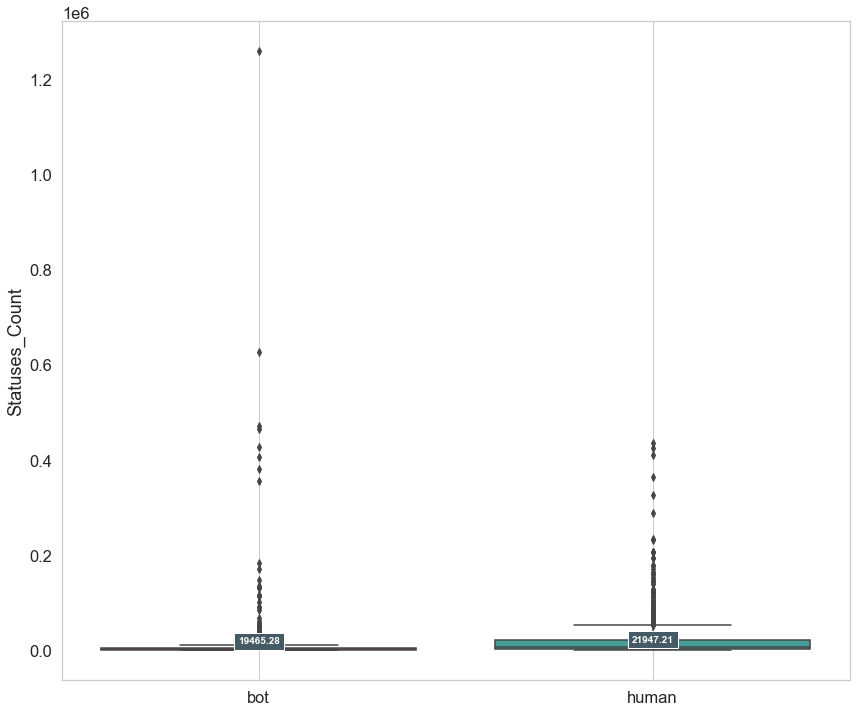

In [31]:
target: str = "statuses_count"  
# Extract histograms
# plot_multiple_histograms(data=twitter_accounts_df, 
#                          grouped_col=grouped,
#                          data_labels=data_labels,
#                          target_col=target)
# Extract Box-plots
plot_multiple_boxplots(data=dataset,
                       grouped_col=grouped,
                       target_col=target,
                       palette=palette)

In [32]:
dataset.describe().to_excel('descriptive_statistics3.xlsx')
dataset.head()

,default_profile,favourites_count,followers_count,friends_count,location,statuses_count,verified,account_age_days,account_type,ratio_statuses_count_per_age,ratio_favorites_per_age,ratio_friends_per_followers,word_count,char_count,reputation,contains_bot_name,description_word_count,description_character_count,avg_word
0,True,2169,0,111,True,2195,False,2875,bot,0.763478,0.754435,2.303236,18,102,0.000000,False,18,85,4.722222
1,True,54,6,65,True,11,False,4014,bot,0.002740,0.013453,10.833333,8,54,0.084507,False,8,47,5.875000
2,False,34328,1132,468,True,28628,False,2988,human,9.580991,11.488621,0.413428,10,54,0.707500,False,10,45,4.500000
3,False,6737,83,382,True,13023,False,2277,human,5.719368,2.958718,4.602410,1,21,0.178495,False,2,20,10.000000
4,False,13498,4397,198,True,15257,False,3036,human,5.025362,4.445982,0.045031,19,157,0.956910,False,19,139,7.315789


In [33]:
dataset.to_csv('cek.csv',index=False)

In [34]:
from sklearn.preprocessing import MinMaxScaler
df = dataset.dropna(axis=0)
# memilih kolom yang ingin diikutkan dalam scaling
cols_to_scale = ["followers_count","default_profile","account_age_days","avg_word","verified","reputation", "friends_count", "favourites_count", "statuses_count"]

# Mengambil subset dari dataset hanya untuk kolom yang digunakan
data_to_scale = dataset[cols_to_scale]

# scaling menggunakan MinMaxScaler pada kolom-kolom yang dipilih
scaler = MinMaxScaler(feature_range=(0,100))

# Fit dan transform data menggunakan scaler
scaled_data = scaler.fit_transform(data_to_scale)
# rescaledX = scaler.fit_transform(twitter_accounts_df[cols_to_scale])

# Mengganti kolom asli dengan data yang telah di-scale
dataset[cols_to_scale] = scaled_data

# Membuat DataFrame dari data yang telah discaling
dataset.describe().to_excel('hasil_descriptive_statistics3.xlsx')

In [35]:
print("Jumlah baris pada df_train:", dataset.shape[0])

Jumlah baris pada df_train: 1200


In [36]:
print(dataset.isna().sum())

default_profile                 0
favourites_count                0
followers_count                 0
friends_count                   0
location                        0
statuses_count                  0
verified                        0
account_age_days                0
account_type                    0
ratio_statuses_count_per_age    0
ratio_favorites_per_age         0
ratio_friends_per_followers     0
word_count                      0
char_count                      0
reputation                      0
contains_bot_name               0
description_word_count          0
description_character_count     0
avg_word                        0
dtype: int64


In [37]:
data_baru = dataset.drop(['location'], axis=1)
# data_baru.head()

In [38]:
print(data_baru.isin(['unknown']).sum())

default_profile                 0
favourites_count                0
followers_count                 0
friends_count                   0
statuses_count                  0
verified                        0
account_age_days                0
account_type                    0
ratio_statuses_count_per_age    0
ratio_favorites_per_age         0
ratio_friends_per_followers     0
word_count                      0
char_count                      0
reputation                      0
contains_bot_name               0
description_word_count          0
description_character_count     0
avg_word                        0
dtype: int64


In [39]:
print(data_baru.dtypes)

default_profile                 float64
favourites_count                float64
followers_count                 float64
friends_count                   float64
statuses_count                  float64
verified                        float64
account_age_days                float64
account_type                     object
ratio_statuses_count_per_age    float64
ratio_favorites_per_age         float64
ratio_friends_per_followers     float64
word_count                        int64
char_count                        int64
reputation                      float64
contains_bot_name                  bool
description_word_count            int64
description_character_count       int64
avg_word                        float64
dtype: object


In [40]:
# #memilih feature yang akan digunakan
X = data_baru.drop('account_type', axis=1) # Memilih semua kolom kecuali 'class'
y = data_baru['account_type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


Akurasi: 0.85


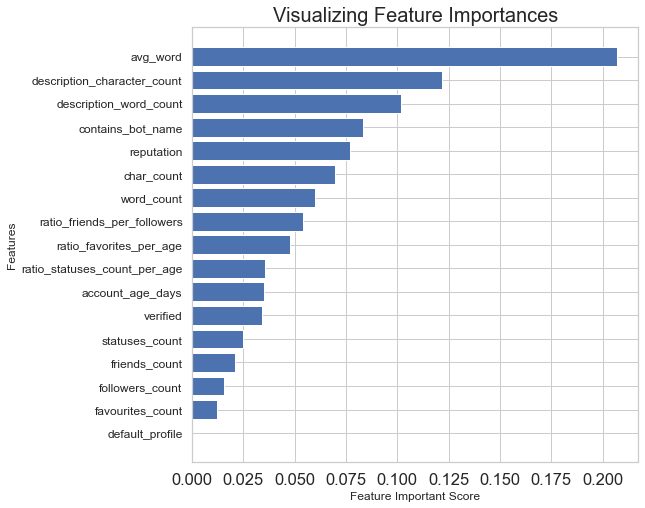

In [41]:
# Membuat model Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data latih
model.fit(X_train, y_train)

tree_feature =  pd.Series(model.feature_importances_, X.columns).sort_values(ascending = True)
plt.figure(figsize = (8,8))
plt.barh(X.columns, tree_feature)
plt.xlabel('Feature Important Score', fontsize = 12)
plt.ylabel('Features', fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Visualizing Feature Importances', fontsize = 20)
# Memprediksi label pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

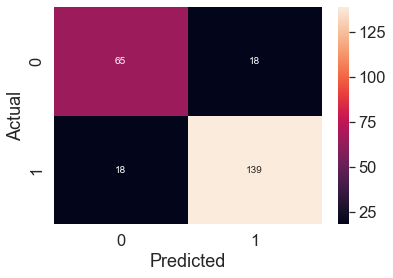

[[ 65  18]
 [ 18 139]]


In [42]:
cm = confusion_matrix(y_test, y_pred)

# membuat plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(cm)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bot       0.78      0.78      0.78        83
       human       0.89      0.89      0.89       157

    accuracy                           0.85       240
   macro avg       0.83      0.83      0.83       240
weighted avg       0.85      0.85      0.85       240



In [44]:
#untuk menyimpan model
import joblib
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(MinMaxScaler(),RandomForestClassifier()) 
pipe.fit(X_train, y_train)
joblib.dump(pipe, 'model.pkl')

['model.pkl']